### Neural Networks

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import csv

In [102]:
import scipy.io as scio
mat_path = './datasets/mnist-original.mat'
 
load_mat = scio.loadmat(mat_path)
# load_mat为字典类型, <class 'dict'>
print(load_mat['data'])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [86]:
def create_dataset():
    np.random.seed(1)
    m = 400 # 数据量
    N = int(m/2) # 每个标签的实例数
    D = 2 # 数据维度
    X = np.zeros((m,D)) # 数据矩阵
    Y = np.zeros((m,1), dtype='uint8') # 标签维度
    a = 4 
    
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

(2, 400) [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]]


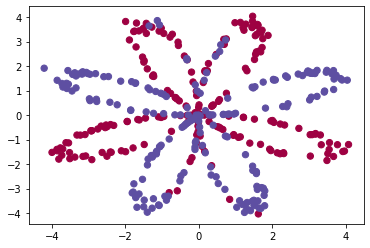

In [87]:
X, Y = create_dataset()
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);
print(X.shape, Y)

In [89]:
x_data = sklearn.datasets.load_mnist().data  # .data返回iris数据集所有输入特征
y_data = sklearn.datasets.load_mnist().target  # .target返回iris数据集所有标签
print("x_data from datasets: \n", x_data)
print("y_data from datasets: \n", y_data)

AttributeError: module 'sklearn.datasets' has no attribute 'load_mnist'

In [9]:
def layer_sizes(X, Y):
    n_x = X.shape[0] # 输入层大小
    n_h1 = 4 # 隐藏层大小
    n_h2 = 4
    n_h3 = 4
    n_y = Y.shape[0] # 输出层大小
    return (n_x, n_h1, n_h2, n_h3, n_y)

p = layer_sizes(X, Y)
print(p)

(2, 4, 4, 4, 1)


In [12]:
def initialize_parameters(n_x, n_h1, n_h2, n_h3, n_y):
    W1 = np.random.randn(n_h1, n_x)*0.01
    b1 = np.zeros((n_h1, 1))
    W2 = np.random.randn(n_h2, n_h1)*0.01
    b2 = np.zeros((n_h2, 1))
    W3 = np.random.randn(n_h3, n_h2)*0.01
    b3 = np.zeros((n_h3, 1))
    W4 = np.random.randn(n_y, n_h3)*0.01
    b4 = np.zeros((n_y, 1)) 
   
    assert (W1.shape == (n_h1, n_x))    
    assert (b1.shape == (n_h1, 1))    
    assert (W2.shape == (n_h2, n_h1))    
    assert (b2.shape == (n_h2, 1)) 
    assert (W3.shape == (n_h3, n_h2))    
    assert (b3.shape == (n_h3, 1)) 
    assert (W4.shape == (n_y, n_h3))    
    assert (b4.shape == (n_y, 1))

    parameters = {"W1": W1, 
                  "b1": b1,                 
                  "W2": W2,                  
                  "b2": b2,
                  "W3": W3, 
                  "b3": b3,                 
                  "W4": W4,                  
                  "b4": b4
                 }   
                   
    return parameters
parameters = initialize_parameters(p[0], p[1], p[2], p[3], p[4])
print(parameters)

{'W1': array([[ 0.00606404,  0.02293718],
       [-0.00830011, -0.0101952 ],
       [-0.00214654,  0.01021248],
       [ 0.0052475 , -0.00477124]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.0003599 ,  0.01037039,  0.0067262 ,  0.02428877],
       [ 0.01005687,  0.00353567,  0.00614726, -0.00348984],
       [-0.00977773,  0.00171957,  0.00490561, -0.01395283],
       [-0.00522356, -0.00369256,  0.00265642, -0.00260466]]), 'b2': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W3': array([[ 0.00445097,  0.00098112,  0.01060328, -0.01711168],
       [ 0.01657125,  0.01417674,  0.00050317,  0.00650323],
       [ 0.00606548, -0.0073729 ,  0.00164665,  0.00778174],
       [ 0.00309817,  0.01051321,  0.00094996,  0.00080751]]), 'b3': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W4': array([[-0.00767804, -0.00364538, -0.00459718,  0.01705484]]), 'b4': array([[0.]])}


In [13]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [47]:
def forward_propagation(X, parameters):
    # 获取各参数初始值
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    # 执行前向计算
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = np.tanh(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = sigmoid(Z4)    
#     assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,                   
             "A1": A1,                   
             "Z2": Z2,                  
             "A2": A2,
             "Z3": Z3,                  
             "A3": A3,
             "Z4": Z4,                  
             "A4": A4
            }    

    return A4, cache
A4, cache = forward_propagation(X, parameters)
print(cache)

{'Z1': array([[ 44.75548807, -18.95772368, -16.40722035, ...,  21.54745552,
        -26.95508668,  38.37155039],
       [-18.57490659,  12.00811145,  10.0840644 , ..., -11.48689744,
         17.81979924, -17.96140542],
       [ 36.98772571,  -9.68487661,  -8.63646039, ...,  15.23900594,
        -13.23165865,  29.43953979],
       [  1.09334297,   1.80738157,   1.42904088, ...,  -0.671844  ,
          2.88307028,  -0.06007721]]), 'A1': array([[ 1.        , -1.        , -1.        , ...,  1.        ,
        -1.        ,  1.        ],
       [-1.        ,  1.        ,  1.        , ..., -1.        ,
         1.        , -1.        ],
       [ 1.        , -0.99999999, -0.99999994, ...,  1.        ,
        -1.        ,  1.        ],
       [ 0.79809503,  0.94756512,  0.89146988, ..., -0.58619155,
         0.99375591, -0.06000504]]), 'Z2': array([[ 4.7040803 , -5.96284038, -5.84981504, ...,  7.49325214,
        -6.05590933,  6.43304926],
       [-2.48881703,  2.17350276,  2.18658422, ..., -

In [75]:
def compute_cost(A4, Y, parameters):
    # 训练样本量
    m = Y.shape[1] 
    # 计算交叉熵损失
    logprobs = np.multiply(np.log(A4),Y) + np.multiply(np.log(1-A4), 1-Y)
    cost = -1/m * np.sum(logprobs)
    # 维度压缩
    cost = np.squeeze(cost)     

    assert(isinstance(cost, float))    
    return cost
cost = compute_cost(A4, Y, parameters)
print(cost)

0.25131986682019714


In [103]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]    
    # 获取W1和W2
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    # 获取A1和A2
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']
    A4 = cache['A4']
    # 执行反向传播
    dZ4 = A4-Y
    dW4 = 1/m * np.dot(dZ4, A3.T)
    db4 = 1/m * np.sum(dZ4, axis=1, keepdims=True)
    dZ3 = np.dot(W4.T, dZ4)*(1-np.power(A3, 2))
    dW3 = 1/m * np.dot(dZ3, A2.T)
    db3 = 1/m * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = np.dot(W3.T, dZ3)*(1-np.power(A2, 2))
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,                      
             "dW2": dW2,             
             "db2": db2,
             "dW3": dW3,             
             "db3": db3,
             "dW4": dW4,             
             "db4": db4
            }   
    return grads
grads = backward_propagation(parameters, cache, X, Y);
print(grads)

ValueError: operands could not be broadcast together with shapes (8,400) (4,400) 

In [104]:
def update_parameters(parameters, grads, learning_rate=1.2):
    # 获取参数
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']   
    W3 = parameters['W3']
    b3 = parameters['b3']   
    W4 = parameters['W4']
    b4 = parameters['b4']   
    # 获取梯度
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']    
    dW3 = grads['dW3']
    db3 = grads['db3']    
    dW4 = grads['dW4']
    db4 = grads['db4']    
    # 参数更新
    W1 -= dW1 * learning_rate
    b1 -= db1 * learning_rate
    W2 -= dW2 * learning_rate
    b2 -= db2 * learning_rate
    W3 -= dW3 * learning_rate
    b3 -= db3 * learning_rate
    W4 -= dW4 * learning_rate
    b4 -= db4 * learning_rate

    parameters = {"W1": W1, 
                  "b1": b1,            
                  "W2": W2,   
                  "b2": b2,
                  "W3": W3,   
                  "b3": b3,
                  "W4": W4,   
                  "b4": b4,
                 }    
    return parameters

In [105]:
def nn_model(X, Y, n_h1, n_h2, n_h3, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[4]    
    # 初始化模型参数
    parameters = initialize_parameters(n_x, n_h1, n_h2, n_h3, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2'] 
    W3 = parameters['W3']
    b3 = parameters['b3'] 
    W4 = parameters['W4']
    b4 = parameters['b4'] 
    # 梯度下降和参数更新循环
    for i in range(0, num_iterations):        
    # 前向传播计算
        A4, cache = forward_propagation(X, parameters)        
        # 计算当前损失
        cost = compute_cost(A4, Y, parameters)        
        # 反向传播
        grads = backward_propagation(parameters, cache, X, Y)        
        # 参数更新
        parameters = update_parameters(parameters, grads, learning_rate=1.2)        
        # 打印损失
        if print_cost and i % 1000 == 0:            
            print ("Cost after iteration %i: %f" %(i, cost))    
            
    return parameters

In [106]:
def predict(parameters, X): 
    A4, cache = forward_propagation(X, parameters)
    predictions = (A4>0.5)
    return predictions

In [107]:
parameters = nn_model(X, Y, n_h1 = 4, n_h2 = 4, n_h3 = 4, num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.693147
Cost after iteration 2000: 0.693147
Cost after iteration 3000: 0.693147
Cost after iteration 4000: 0.693146
Cost after iteration 5000: 0.384876
Cost after iteration 6000: 0.260995
Cost after iteration 7000: 0.245321
Cost after iteration 8000: 0.209684
Cost after iteration 9000: 0.210074


In [108]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + 
      np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


In [109]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Accuracy for 1 hidden units: 65.75 %
Accuracy for 2 hidden units: 75.0 %
Accuracy for 3 hidden units: 48.5 %
Accuracy for 4 hidden units: 46.0 %
Accuracy for 5 hidden units: 55.25 %
Accuracy for 10 hidden units: 89.0 %
Accuracy for 20 hidden units: 91.25 %


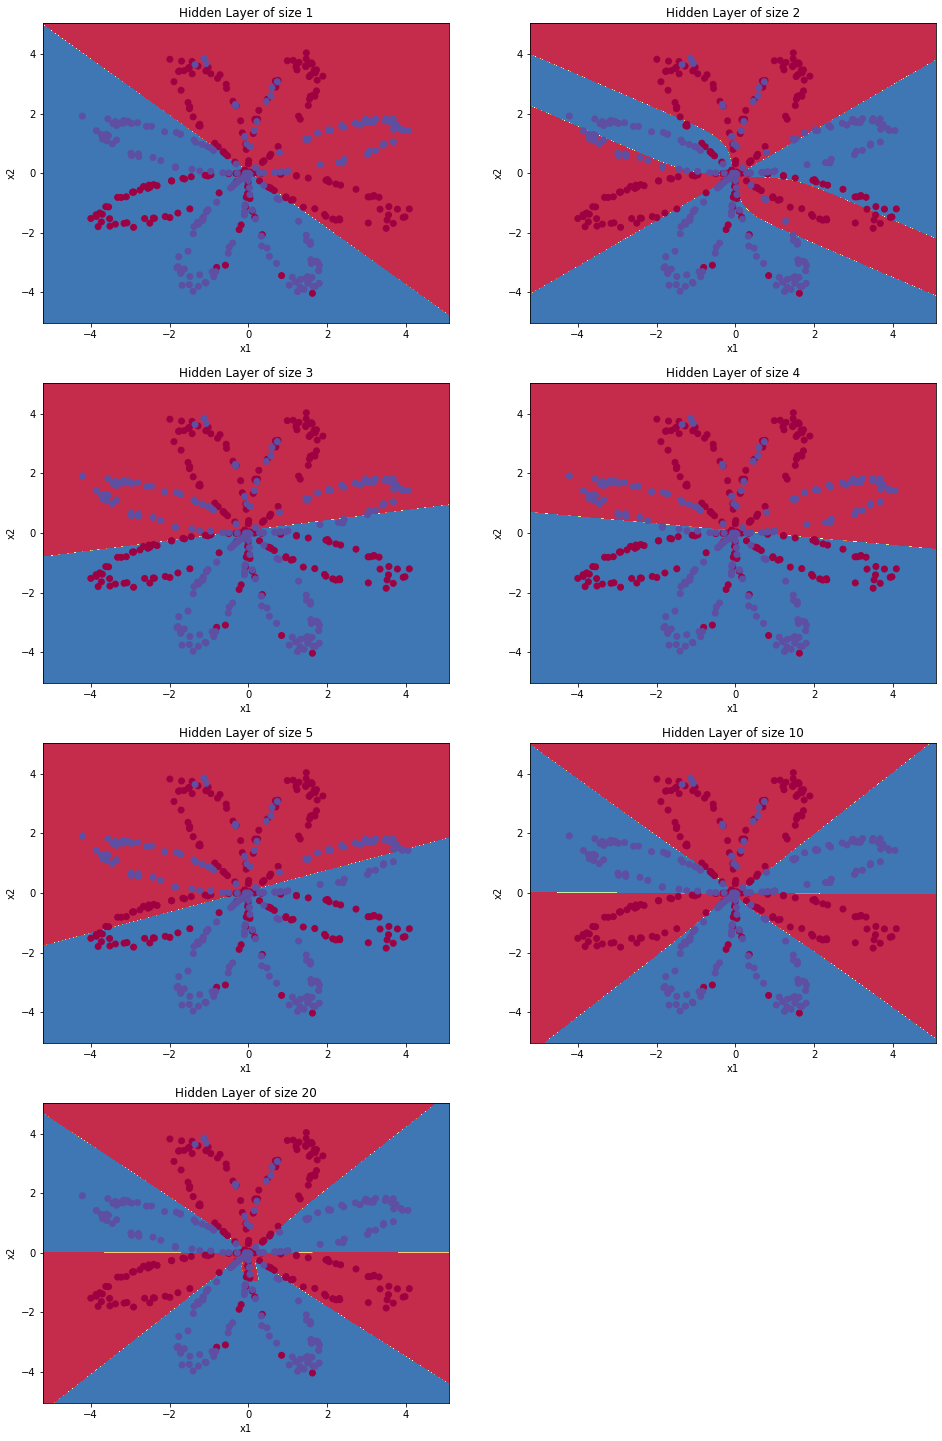

In [110]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20]
for i, n_h1 in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h1)
    parameters = nn_model(X, Y, n_h1, n_h2 = 8, n_h3 = 4, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h1, accuracy))

In [71]:
print(X.shape, Y.shape)

(2, 400) (1, 400)


In [72]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(4), random_state=1)
clf.fit(X.T, Y.T)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=4, random_state=1, solver='sgd')

In [73]:
Y.T[0]

array([0], dtype=uint8)

In [74]:
clf.predict(X.T[:5])

array([0, 1, 1, 1, 0], dtype=uint8)